In [1]:
from os import chdir
chdir('..')

In [137]:
# import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib notebook
sns.set(font_scale=1.1)

In [3]:
df = pd.read_csv('./test_fixtures/results/all_timings.csv')
df = df.replace('migloveholes', 'miglove')
df_all_section = df[df.section == 'all']
df_pl = df[df.alg == 'polylidar']
df_pl_sec = df_pl[df_pl.section != 'all']
df.head()

,alg,holes,l2_norm,points,section,shape,time
0,polylidar,True,NaN,2000,delaunay,miglove,0.971
1,polylidar,True,NaN,2000,delaunay,miglove,0.919
2,polylidar,True,NaN,2000,delaunay,miglove,0.717
3,polylidar,True,NaN,2000,delaunay,miglove,0.718
4,polylidar,True,NaN,2000,delaunay,miglove,0.761


<IPython.core.display.Javascript object>


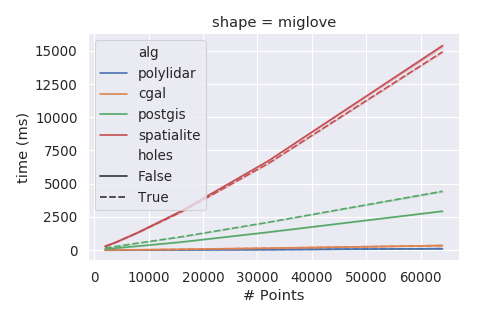

In [138]:
# fig = plt.Figure()
g = sns.relplot(x="points", y="time", hue="alg", style='holes',
            facet_kws=dict(sharex=True, legend_out=False),col="shape",
            kind="line", legend='brief', data=df_all_section,
            height=4, aspect=1.5)
g.set_ylabels("time (ms)")
g.set_xlabels("# Points")
# g.ax.legend(loc=2)
# g.despine(left=True)
# plt.legend(loc='upper left')
g.savefig('assets/pics/compare_algs_time.pdf')
# g.set(yscale="log")

<IPython.core.display.Javascript object>


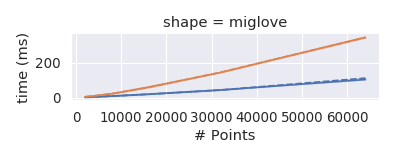

In [139]:
df_all_poly_cgal = df_all_section[df_all_section.alg.isin(['polylidar', 'cgal'])]
g = sns.relplot(x="points", y="time", hue="alg", style='holes',
            facet_kws=dict(sharex=True, legend_out=True),col="shape",
            kind="line", legend=False, data=df_all_poly_cgal,
            height=2, aspect=2.5)
g.set_ylabels("time (ms)")
g.set_xlabels("# Points")
# g.ax.legend(loc=2)
# g.despine(left=True)
# plt.legend(loc='upper left')
g.savefig('assets/pics/compare_algs_time_poly_cgal.pdf')

<IPython.core.display.Javascript object>


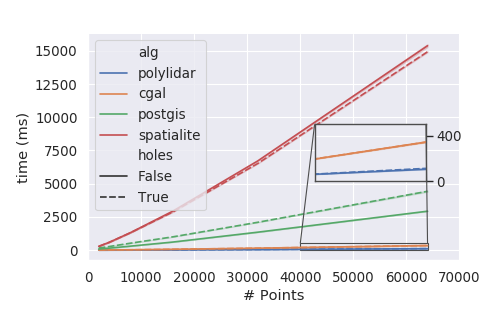

In [140]:
# fig = plt.Figure()
g = sns.relplot(x="points", y="time", hue="alg", style='holes',
            facet_kws=dict(sharex=True, legend_out=False, margin_titles=False),col="shape",
            kind="line", legend='brief', data=df_all_section,
            height=4, aspect=1.5)
g.set_ylabels("time (ms)")
g.set_xlabels("# Points")
g.set_titles('')
ax = g.facet_axis(0,0)
ax.set_xlim([0, 70000])
axins = ax.inset_axes((0.61,0.35,.3,.25))
# axins = zoomed_inset_axes(ax,1.0,loc=1) # zoom=6
x1,x2,y1,y2 = 40000, 64000, 0, 500
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
axins.set_xticks([])
axins.set_yticks([0, 400])
axins.yaxis.tick_right()

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.3")
sns.lineplot(x='points', y='time', hue='alg', style='holes', legend=False, data=df_all_poly_cgal, ax=axins)
axins.set_xlabel('')
axins.set_ylabel('')
for spine in axins.spines.values():
    spine.set_edgecolor('0.3')
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.setp(axins,xticks=[],yticks=[])
# # draw a bbox of the region of the inset axes in the parent axes and
# # connecting lines between the bbox and the inset axes area
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# g.ax.legend(loc=2)
# g.despine(left=True)
# plt.legend(loc='upper left')
g.savefig('assets/pics/compare_algs_time_inset.pdf')

<IPython.core.display.Javascript object>


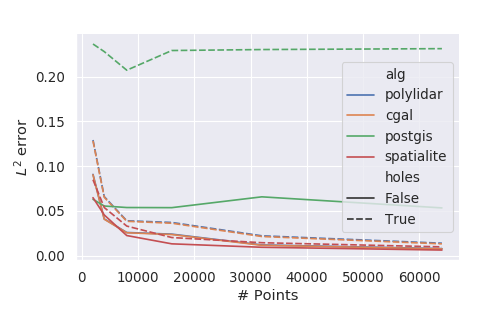

In [141]:
fig = plt.Figure((5,5))
g = sns.relplot(x="points", y="l2_norm", hue="alg", style='holes',
            facet_kws=dict(sharex=True, legend_out=False),col="shape",
            kind="line", legend="full", data=df_all_section,
            height=4, aspect=1.5)
g.set_titles('')
g.set_ylabels(r'$L^2$ error')
g.set_xlabels("# Points")
g.savefig('assets/pics/compare_algs_accuracy.pdf')
# g.set(yscale="log")

<IPython.core.display.Javascript object>


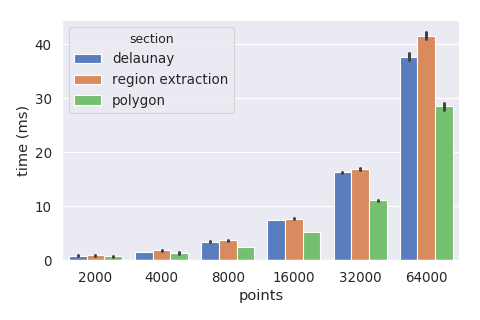

In [142]:
fig = plt.Figure((5,5))
df_pl_sec = df_pl_sec.replace('mesh', 'region extraction')
g = sns.catplot(x="points", y="time", hue="section", data=df_pl_sec, kind="bar", palette="muted",
                hue_order=["delaunay", "region extraction", "polygon"],  height=4, aspect=1.5, legend_out=False)

g.set_ylabels("time (ms)")
g.savefig('assets/pics/polylidar_decomposed.pdf')
# g.set(yscale="log")
# g.savefig("imgs/timing_results.pdf")

In [7]:
df_pl_sec_miglove = df_pl_sec[df_pl_sec['shape'] == 'miglove']

df_new = df_pl_sec_miglove.groupby([df_pl_sec_miglove['section'], df_pl_sec_miglove['points']]).mean()
df_new = df_new.reset_index()
df_delaunay = df_new[df_new['section'] == 'delaunay']
df_mesh = df_new[df_new['section'] == 'mesh']
df_polygon = df_new[df_new['section'] == 'polygon']

delaunay_diff = df_delaunay['time'].pct_change().reset_index()
mesh_diff = df_mesh['time'].pct_change().reset_index()
polygon_diff = df_polygon['time'].pct_change().reset_index()

values = []
names = ['delaunay_PctChange', 'mesh_PctChange', 'polygon_PctChange']
values.append(delaunay_diff.values[1:,1])
values.append(mesh_diff.values[1:, 1])
values.append(polygon_diff.values[1:, 1])

pd.DataFrame.from_items(zip(names, values))



/home/jeremy/miniconda3/envs/concave/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
